In [1]:
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set project root to the parent directory of the notebook (assumes notebook is in notebook/)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.model import build_model, train_and_retrain_model
from src.prediction import predict_single_from_path, load_model
from src.utils import load_and_split_data, plot_batch, plot_history,count_samples,plot_confusion_matrix

# Set paths relative to project root
TRAIN_DIR = os.path.join(project_root, 'data', 'train')
TEST_DIR = os.path.join(project_root, 'data', 'test')
MODEL_PATH = os.path.join(project_root, 'models', 'skin_cancer_class.keras')
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorfl

INFO:src.utils:Loading data from train_dir: c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\train, test_dir: c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\test


Found 139 files belonging to 2 classes.
Using 112 files for training.


INFO:src.utils:Loaded training dataset.


Found 139 files belonging to 2 classes.
Using 27 files for validation.


INFO:src.utils:Loaded validation dataset.


Found 56 files belonging to 2 classes.


INFO:src.utils:Loaded test dataset.
INFO:src.utils:Class names: ['benign', 'malignant']


Class names found: ['benign', 'malignant']
Training samples: {'benign': 39, 'malignant': 73}
Validation samples: {'benign': 9, 'malignant': 18}
Test samples: {'benign': 19, 'malignant': 37}


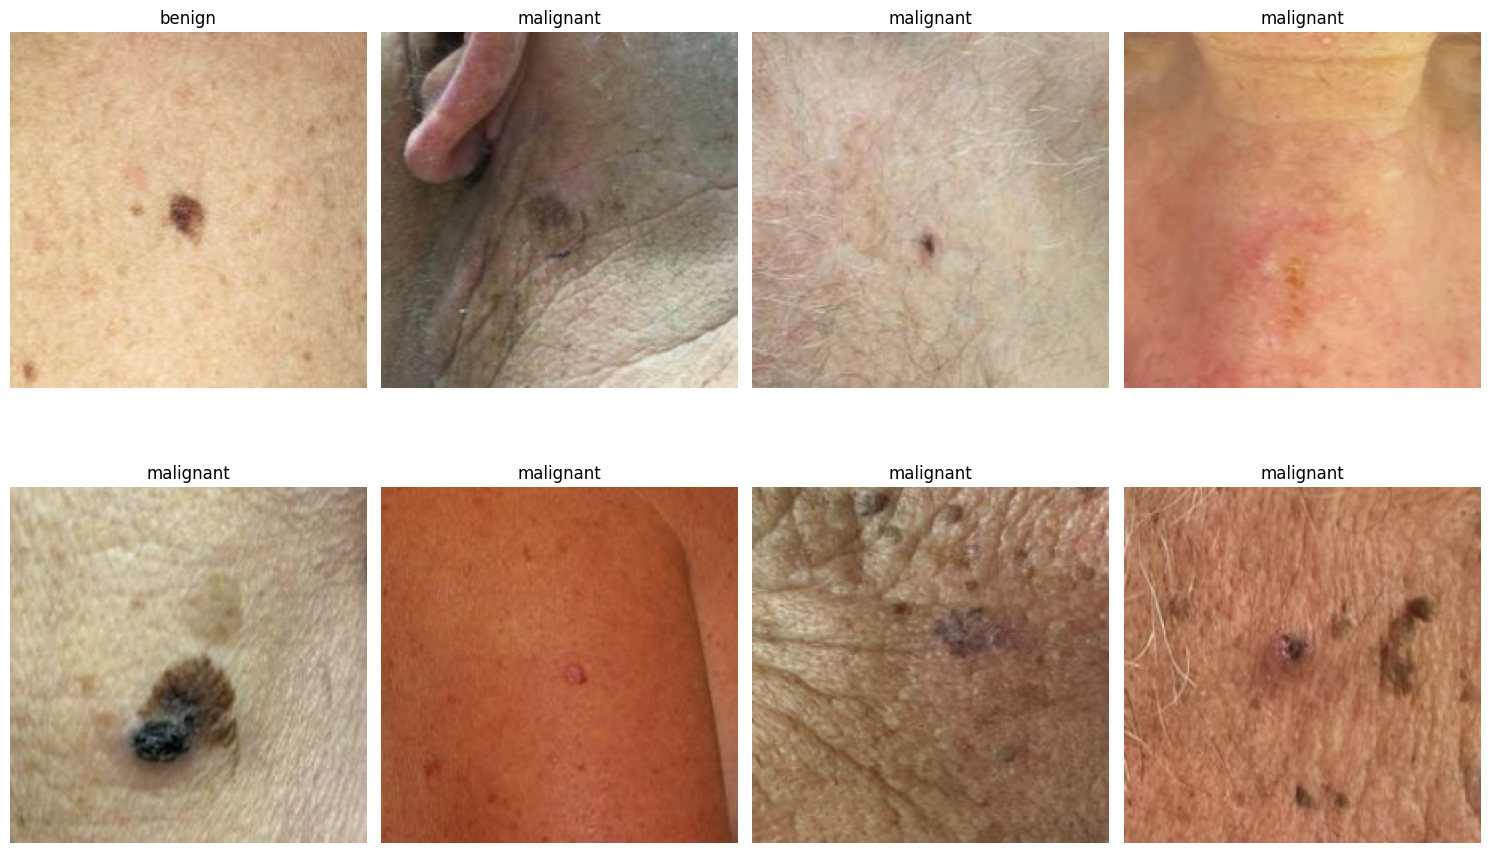

In [2]:
TRAIN_DIR = os.path.abspath(os.path.join('..', 'data', 'train'))
TEST_DIR = os.path.abspath(os.path.join('..', 'data', 'test'))
training_set, validation_set, test_set, class_names = load_and_split_data(
    train_dir=TRAIN_DIR,
    test_dir=TEST_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)
print(f'Class names found: {class_names}')
print('Training samples:', count_samples(training_set, class_names))
print('Validation samples:', count_samples(validation_set, class_names))
print('Test samples:', count_samples(test_set, class_names))

# Visualize a batch of augmented data
plot_batch(training_set, class_names)

In [4]:
# Train the model
history, model, class_names = train_and_retrain_model()

# Save the model
MODEL_PATH = os.path.abspath(os.path.join('..', 'models', 'skin_cancer_class.keras'))
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
model.save(MODEL_PATH)
print(f"Model saved successfully to {MODEL_PATH}")

INFO:src.model:--- Starting Model Retraining ---
INFO:src.model:Checking directories: TRAIN_DIR=c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\train, TEST_DIR=c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\test, NEW_DATA_DIR=c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\new_uploads
INFO:src.model:Loading and preparing data...
INFO:src.utils:Loading data from train_dir: c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\train, test_dir: c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\test


Found 139 files belonging to 2 classes.
Using 112 files for training.


INFO:src.utils:Loaded training dataset.


Found 139 files belonging to 2 classes.
Using 27 files for validation.


INFO:src.utils:Loaded validation dataset.


Found 56 files belonging to 2 classes.


INFO:src.utils:Loaded test dataset.
INFO:src.utils:Class names: ['benign', 'malignant']
INFO:src.model:Loaded data with classes: ['benign', 'malignant']
INFO:src.model:Loading new uploads from c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\data\new_uploads...


Found 4 files belonging to 1 classes.


INFO:src.model:New dataset classes: ['malignant']
INFO:src.model:Expected number of classes: 2 (['benign', 'malignant'])
INFO:src.model:Loading existing model from c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\models\skin_cancer_class.keras...
ERROR:src.model:Failed to load model: 'Dense' object has no attribute 'output_shape'. Building new model...
INFO:src.model:Continuing training...


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 944ms/step - accuracy: 0.6071 - loss: 0.8015 - precision: 0.6071 - recall: 0.6071 - val_accuracy: 0.5185 - val_loss: 0.7866 - val_precision: 0.5185 - val_recall: 0.5185
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.6518 - loss: 0.6169 - precision: 0.6518 - recall: 0.6518 - val_accuracy: 0.7037 - val_loss: 0.5754 - val_precision: 0.7037 - val_recall: 0.7037
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 576ms/step - accuracy: 0.7768 - loss: 0.4311 - precision: 0.7768 - recall: 0.7768 - val_accuracy: 0.7407 - val_loss: 0.4978 - val_precision: 0.7407 - val_recall: 0.7407
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - accuracy: 0.8125 - loss: 0.4303 - precision: 0.8125 - recall: 0.8125 - val_accuracy: 0.8148 - val_loss: 0.4471 - val_precision: 0.8148 - val_recall: 0.8148
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 0.8304 - loss: 0.3321 - precision: 0.8304 - recall: 0.8304 - val_accuracy: 0.8148 - val_loss: 0.4271 - val

INFO:src.model:Training completed successfully.
INFO:src.model:Saving updated model to c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\models\skin_cancer_class.keras...
INFO:src.model:--- Model retraining complete. ---


Model saved successfully to c:\Users\TestSolutions\Desktop\Summative - ML Pipeline\models\skin_cancer_class.keras


Evaluating model on test set...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8929 - loss: 0.2276 - precision: 0.8929 - recall: 0.8929
Test Loss: 0.2276
Test Accuracy: 0.8929
Test Precision: 0.8929
Test Recall: 0.8929
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


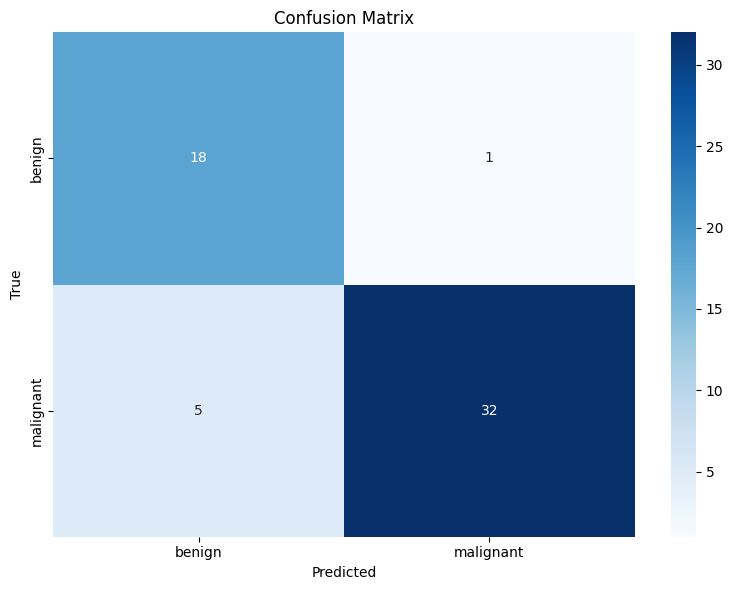

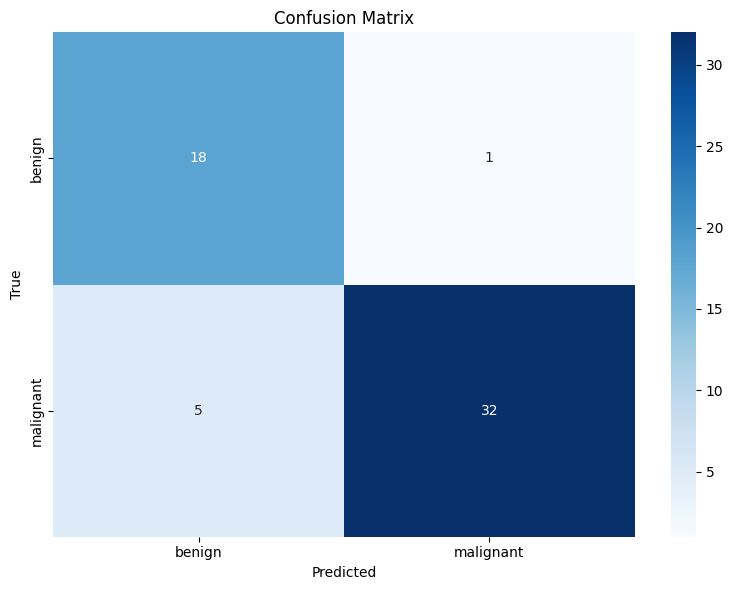

In [8]:
# Evaluate model
print('Evaluating model on test set...')
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_set)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')

# Confusion matrix
y_true = np.concatenate([np.argmax(y, axis=1) for _, y in test_set])
y_pred = np.argmax(model.predict(test_set), axis=1)
plot_confusion_matrix(y_true, y_pred, class_names)

In [ ]:
# Predict on a single image
sample_image = os.path.abspath(os.path.join('..', 'data', 'test', 'benign', 'ISIC_5219984.jpg'))
model = load_model(MODEL_PATH)
prediction, confidence = predict_single_from_path(sample_image, model)
if prediction:
    print(f'Predicted: {prediction}, Confidence: {confidence:.4f}')
else:
    print('Prediction failed.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
Predicted: benign, Confidence: 0.5266
